# Project 4

## Neural Networks

Attempts to harness the power of neural networks to explore whether any additional accuracy could be obtained from these features.

As will be demonstrated, the accuracy is not significantly better than any other attempted model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input

In [2]:
# Import data
full_df = pd.read_csv('../data/ohe_data.csv')

full_df.drop(columns=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

# drop "Unnamed: 0" column if exists
if "Unnamed: 0" in full_df.columns: full_df.drop(columns=['Unnamed: 0'], inplace=True)

# correct sunrise/sunset column to be numerical if not, 0=Day, 1=Night
full_df = full_df.replace({'Day': 0, 'Night': 1})

# make any true/false values into 1/0
full_df = full_df.replace({True: 1, False: 0})

In [3]:
model_df = full_df
model_df.shape, model_df['Severity'].value_counts(normalize=True)

((2731050, 130),
 0    0.900065
 1    0.099935
 Name: Severity, dtype: float64)

In [4]:
# create X and y
X = model_df.drop('Severity', axis=1)
y = model_df['Severity']

# resample to even out categories via undersampling majority class
rus = RandomUnderSampler(random_state=1)
X_rs, y_rs = rus.fit_resample(X, y)
print(X_rs.shape, y_rs.shape)
print(y_rs.value_counts(normalize=True))

# scale X data
mms = MinMaxScaler()
X_mms = mms.fit_transform(X_rs)

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X_mms, y_rs,
                                                    stratify=y_rs,
                                                    random_state=1)

(545856, 129) (545856,)
0    0.5
1    0.5
Name: Severity, dtype: float64


In [5]:
nn = Sequential()
#nn.add(Input(shape=X_train.shape[1]))
nn.add(Dense(32, 'relu'))
nn.add(Dense(1, 'sigmoid'))

nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

In [6]:
%%time

nnh = nn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
3199/3199 [==============================] - 5s 1ms/step - loss: 0.4016 - accuracy: 0.8302 - precision: 0.8211 - recall: 0.8444 - val_loss: 0.3772 - val_accuracy: 0.8413 - val_precision: 0.8331 - val_recall: 0.8536
Epoch 2/20
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3688 - accuracy: 0.8452 - precision: 0.8334 - recall: 0.8630 - val_loss: 0.3696 - val_accuracy: 0.8449 - val_precision: 0.8236 - val_recall: 0.8779
Epoch 3/20
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3626 - accuracy: 0.8475 - precision: 0.8355 - recall: 0.8653 - val_loss: 0.3649 - val_accuracy: 0.8466 - val_precision: 0.8405 - val_recall: 0.8555
Epoch 4/20
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3596 - accuracy: 0.8487 - precision: 0.8372 - recall: 0.8659 - val_loss: 0.3630 - val_accuracy: 0.8477 - val_precision: 0.8393 - val_recall: 0.8601
Epoch 5/20
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3575 - accuracy: 0

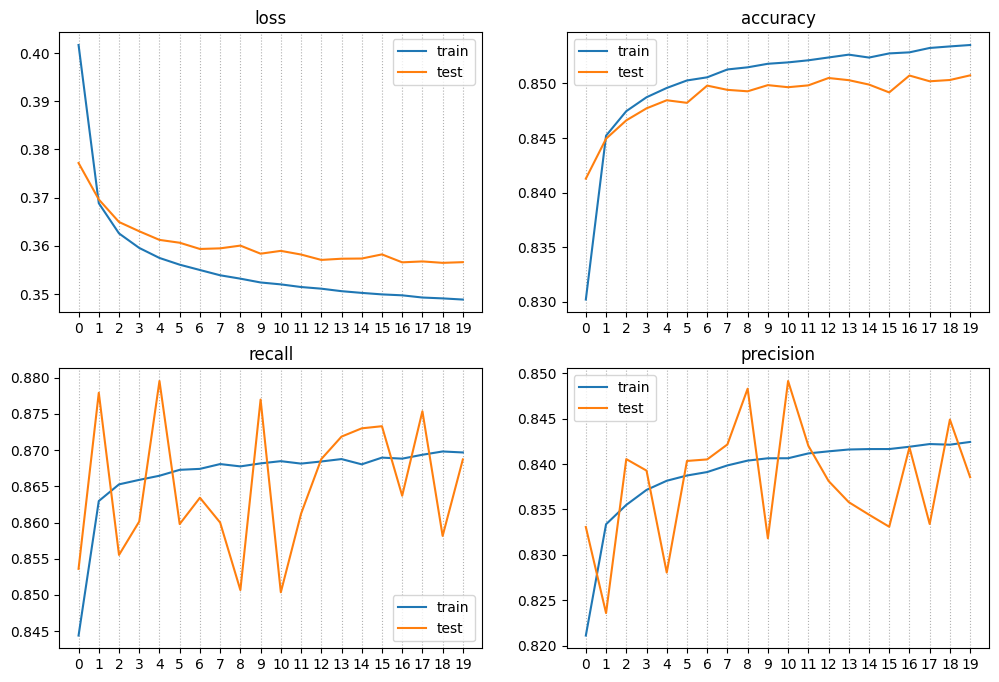

In [7]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

metrics = ['loss', 'accuracy', 'recall', 'precision']
ix = 0

for i in (0,1):
    for j in (0,1):
        m = metrics[ix]
        ax[i][j].plot(nnh.history[m], label='train')
        ax[i][j].plot(nnh.history['val_' + m], label='test')
        #ax.set_ylim(0.2, 0.3)
        ax[i][j].set_xticks(list(range(0,20)))
        ax[i][j].grid(True, axis='x', ls=':')
        ax[i][j].set_title(m)
        ax[i][j].legend()
        ix += 1

In [8]:
np.argmax(nnh.history['val_recall'])

4

In [9]:
# If we are aiming for best recall, then let's find it and 
# use that number of epochs on this run (accuracy is pretty stable so
# I'm not worrying about there being any serious accuracy issues when
# choosing based on recall)

epochs = np.argmax(nnh.history['val_recall'])

nn2 = Sequential()
#nn.add(Input(shape=X_train.shape[1]))
nn2.add(Dense(32, 'relu'))
nn2.add(Dense(1, 'sigmoid'))

nn2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

nnh2 = nn2.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/4
3199/3199 [==============================] - 5s 1ms/step - loss: 0.4035 - accuracy: 0.8293 - precision: 0.8225 - recall: 0.8398 - val_loss: 0.3774 - val_accuracy: 0.8420 - val_precision: 0.8256 - val_recall: 0.8671
Epoch 2/4
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3696 - accuracy: 0.8450 - precision: 0.8337 - recall: 0.8620 - val_loss: 0.3694 - val_accuracy: 0.8432 - val_precision: 0.8365 - val_recall: 0.8532
Epoch 3/4
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3631 - accuracy: 0.8476 - precision: 0.8364 - recall: 0.8641 - val_loss: 0.3657 - val_accuracy: 0.8467 - val_precision: 0.8343 - val_recall: 0.8653
Epoch 4/4
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3595 - accuracy: 0.8491 - precision: 0.8380 - recall: 0.8656 - val_loss: 0.3634 - val_accuracy: 0.8478 - val_precision: 0.8465 - val_recall: 0.8498


In [10]:
test_preds = nn2.predict(X_test)

4265/4265 [==============================] - 3s 625us/step


In [11]:
cm = confusion_matrix(y_test, (test_preds >= 0.5).astype(int), normalize='true')
cm

array([[0.84589342, 0.15410658],
       [0.15023743, 0.84976257]])

In [12]:
tn, fp, fn, tp = cm.flatten()
tn, fp, fn, tp

(0.8458934224410833,
 0.15410657755891663,
 0.15023742525501232,
 0.8497625747449877)

In [13]:
recall = tp / (tp + fn)
recall

0.8497625747449877

In [14]:
# try model on a few random samples (low-budget cross-val)
n_tries = 5
for i in range(n_tries):
    sample = model_df.sample(250_000)
    sample_y = sample['Severity']
    sample_X = sample.drop('Severity', axis=1)
    mms = MinMaxScaler()
    sXmms = mms.fit_transform(sample_X)
    print(i)
    print(classification_report(sample_y, (nn2.predict(sXmms) >= 0.5).astype(int)))

0
7813/7813 [==============================] - 5s 629us/step
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    224948
           1       0.38      0.85      0.52     25052

    accuracy                           0.84    250000
   macro avg       0.68      0.85      0.71    250000
weighted avg       0.92      0.84      0.87    250000

1
7813/7813 [==============================] - 5s 630us/step
              precision    recall  f1-score   support

           0       0.98      0.86      0.92    225237
           1       0.39      0.83      0.54     24763

    accuracy                           0.86    250000
   macro avg       0.69      0.85      0.73    250000
weighted avg       0.92      0.86      0.88    250000

2
7813/7813 [==============================] - 5s 630us/step
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    225033
           1       0.38      0.86      0.52     24967


### Conclusion

Neural Network supports logistic regression results, with perhaps slightly better accuracy. Recall is pretty decent over the tests, which is what we are looking for.

In [15]:
# Gabe's neural network
saved_model = load_model('../models/model1')

In [16]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 18,471
Trainable params: 18,471
Non-trainable params: 0
_________________________________________________________________


In [17]:
# try model on a few random samples (low-budget cross-val)
n_tries = 5
for i in range(n_tries):
    sample = model_df.sample(250_000)
    sample_y = sample['Severity']
    sample_X = sample.drop('Severity', axis=1)
    mms = MinMaxScaler()
    sXmms = mms.fit_transform(sample_X)
    print(i)
    print(classification_report(sample_y, (saved_model.predict(sXmms) >= 0.5).astype(int)))

0


ValueError: in user code:

    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ffomezolam/.pyenv/versions/3.10.4/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 128), found shape=(None, 129)
